In [1]:
import re

<link href="style.css" rel="stylesheet"></link>

<article class="day-desc"><h2>--- Day 2: Cube Conundrum ---</h2><p>You're launched high into the atmosphere! The apex of your trajectory just barely reaches the surface of a large island floating in the sky. You gently land in a fluffy pile of leaves. It's quite cold, but you don't see much snow. An Elf runs over to greet you.</p>
<p>The Elf explains that you've arrived at <em>Snow Island</em> and apologizes for the lack of snow. He'll be happy to explain the situation, but it's a bit of a walk, so you have some time. They don't get many visitors up here; <span title="No, the Elf's name is not 'WOPR'. It's Joshua.">would you like to play a game</span> in the meantime?</p>
<p>As you walk, the Elf shows you a small bag and some cubes which are either red, green, or blue. Each time you play this game, he will hide a secret number of cubes of each color in the bag, and your goal is to figure out information about the number of cubes.</p>
<p>To get information, once a bag has been loaded with cubes, the Elf will reach into the bag, grab a handful of random cubes, show them to you, and then put them back in the bag. He'll do this a few times per game.</p>
<p>You play several games and record the information from each game (your puzzle input). Each game is listed with its ID number (like the <code>11</code> in <code>Game 11: ...</code>) followed by a semicolon-separated list of subsets of cubes that were revealed from the bag (like <code>3 red, 5 green, 4 blue</code>).</p>
<p>For example, the record of a few games might look like this:</p>
<pre><code>
Game 1: 3 blue, 4 red; 1 red, 2 green, 6 blue; 2 green
Game 2: 1 blue, 2 green; 3 green, 4 blue, 1 red; 1 green, 1 blue
Game 3: 8 green, 6 blue, 20 red; 5 blue, 4 red, 13 green; 5 green, 1 red
Game 4: 1 green, 3 red, 6 blue; 3 green, 6 red; 3 green, 15 blue, 14 red
Game 5: 6 red, 1 blue, 3 green; 2 blue, 1 red, 2 green
</code></pre>
<p>In game 1, three sets of cubes are revealed from the bag (and then put back again). The first set is 3 blue cubes and 4 red cubes; the second set is 1 red cube, 2 green cubes, and 6 blue cubes; the third set is only 2 green cubes.</p>
<p>The Elf would first like to know which games would have been possible if the bag contained <em>only 12 red cubes, 13 green cubes, and 14 blue cubes</em>?</p>
<p>In the example above, games 1, 2, and 5 would have been <em>possible</em> if the bag had been loaded with that configuration. However, game 3 would have been <em>impossible</em> because at one point the Elf showed you 20 red cubes at once; similarly, game 4 would also have been <em>impossible</em> because the Elf showed you 15 blue cubes at once. If you add up the IDs of the games that would have been possible, you get <code><em>8</em></code>.</p>
<p>Determine which games would have been possible if the bag had been loaded with only 12 red cubes, 13 green cubes, and 14 blue cubes. <em>What is the sum of the IDs of those games?</em></p>
</article>


In [2]:
games_text_test = """Game 1: 3 blue, 4 red; 1 red, 2 green, 6 blue; 2 green
Game 2: 1 blue, 2 green; 3 green, 4 blue, 1 red; 1 green, 1 blue
Game 3: 8 green, 6 blue, 20 red; 5 blue, 4 red, 13 green; 5 green, 1 red
Game 4: 1 green, 3 red, 6 blue; 3 green, 6 red; 3 green, 15 blue, 14 red
Game 5: 6 red, 1 blue, 3 green; 2 blue, 1 red, 2 green"""

expected = 8
bag_test = {"red": 12, "green": 13, "blue": 14}

In [3]:
from itertools import chain


def sum_of_possible_set_ids(game_text: str, bag: dict[str, int]) -> int:
    sum_of_possible_set_ids = 0
    for set_number, line in enumerate(game_text.splitlines(), start=1):
        cube_set = [re.split(r";|:", line)[1:]]
        cube_set = [[ss.strip() for ss in s.split(",")] for st in cube_set for s in st]
        cube_set = [[item.split(" ") for item in st] for st in cube_set]
        cube_set = [{color: int(count) for count, color in st} for st in cube_set]
        # print(f'{cube_set=}')
        is_possible = all(
            all(color in bag and value <= bag[color] for color, value in st.items())
            for st in cube_set
        )
        if is_possible:
            sum_of_possible_set_ids += set_number
    return sum_of_possible_set_ids


assert sum_of_possible_set_ids(games_text_test, bag_test) == 8

In [4]:
# 12 red cubes, 13 green cubes, and 14 blue cubes
bag = {"red": 12, "green": 13, "blue": 14}
with open("./input/day2.txt") as f:
    print(sum_of_possible_set_ids(f.read(), bag))

# 309 too low

2685


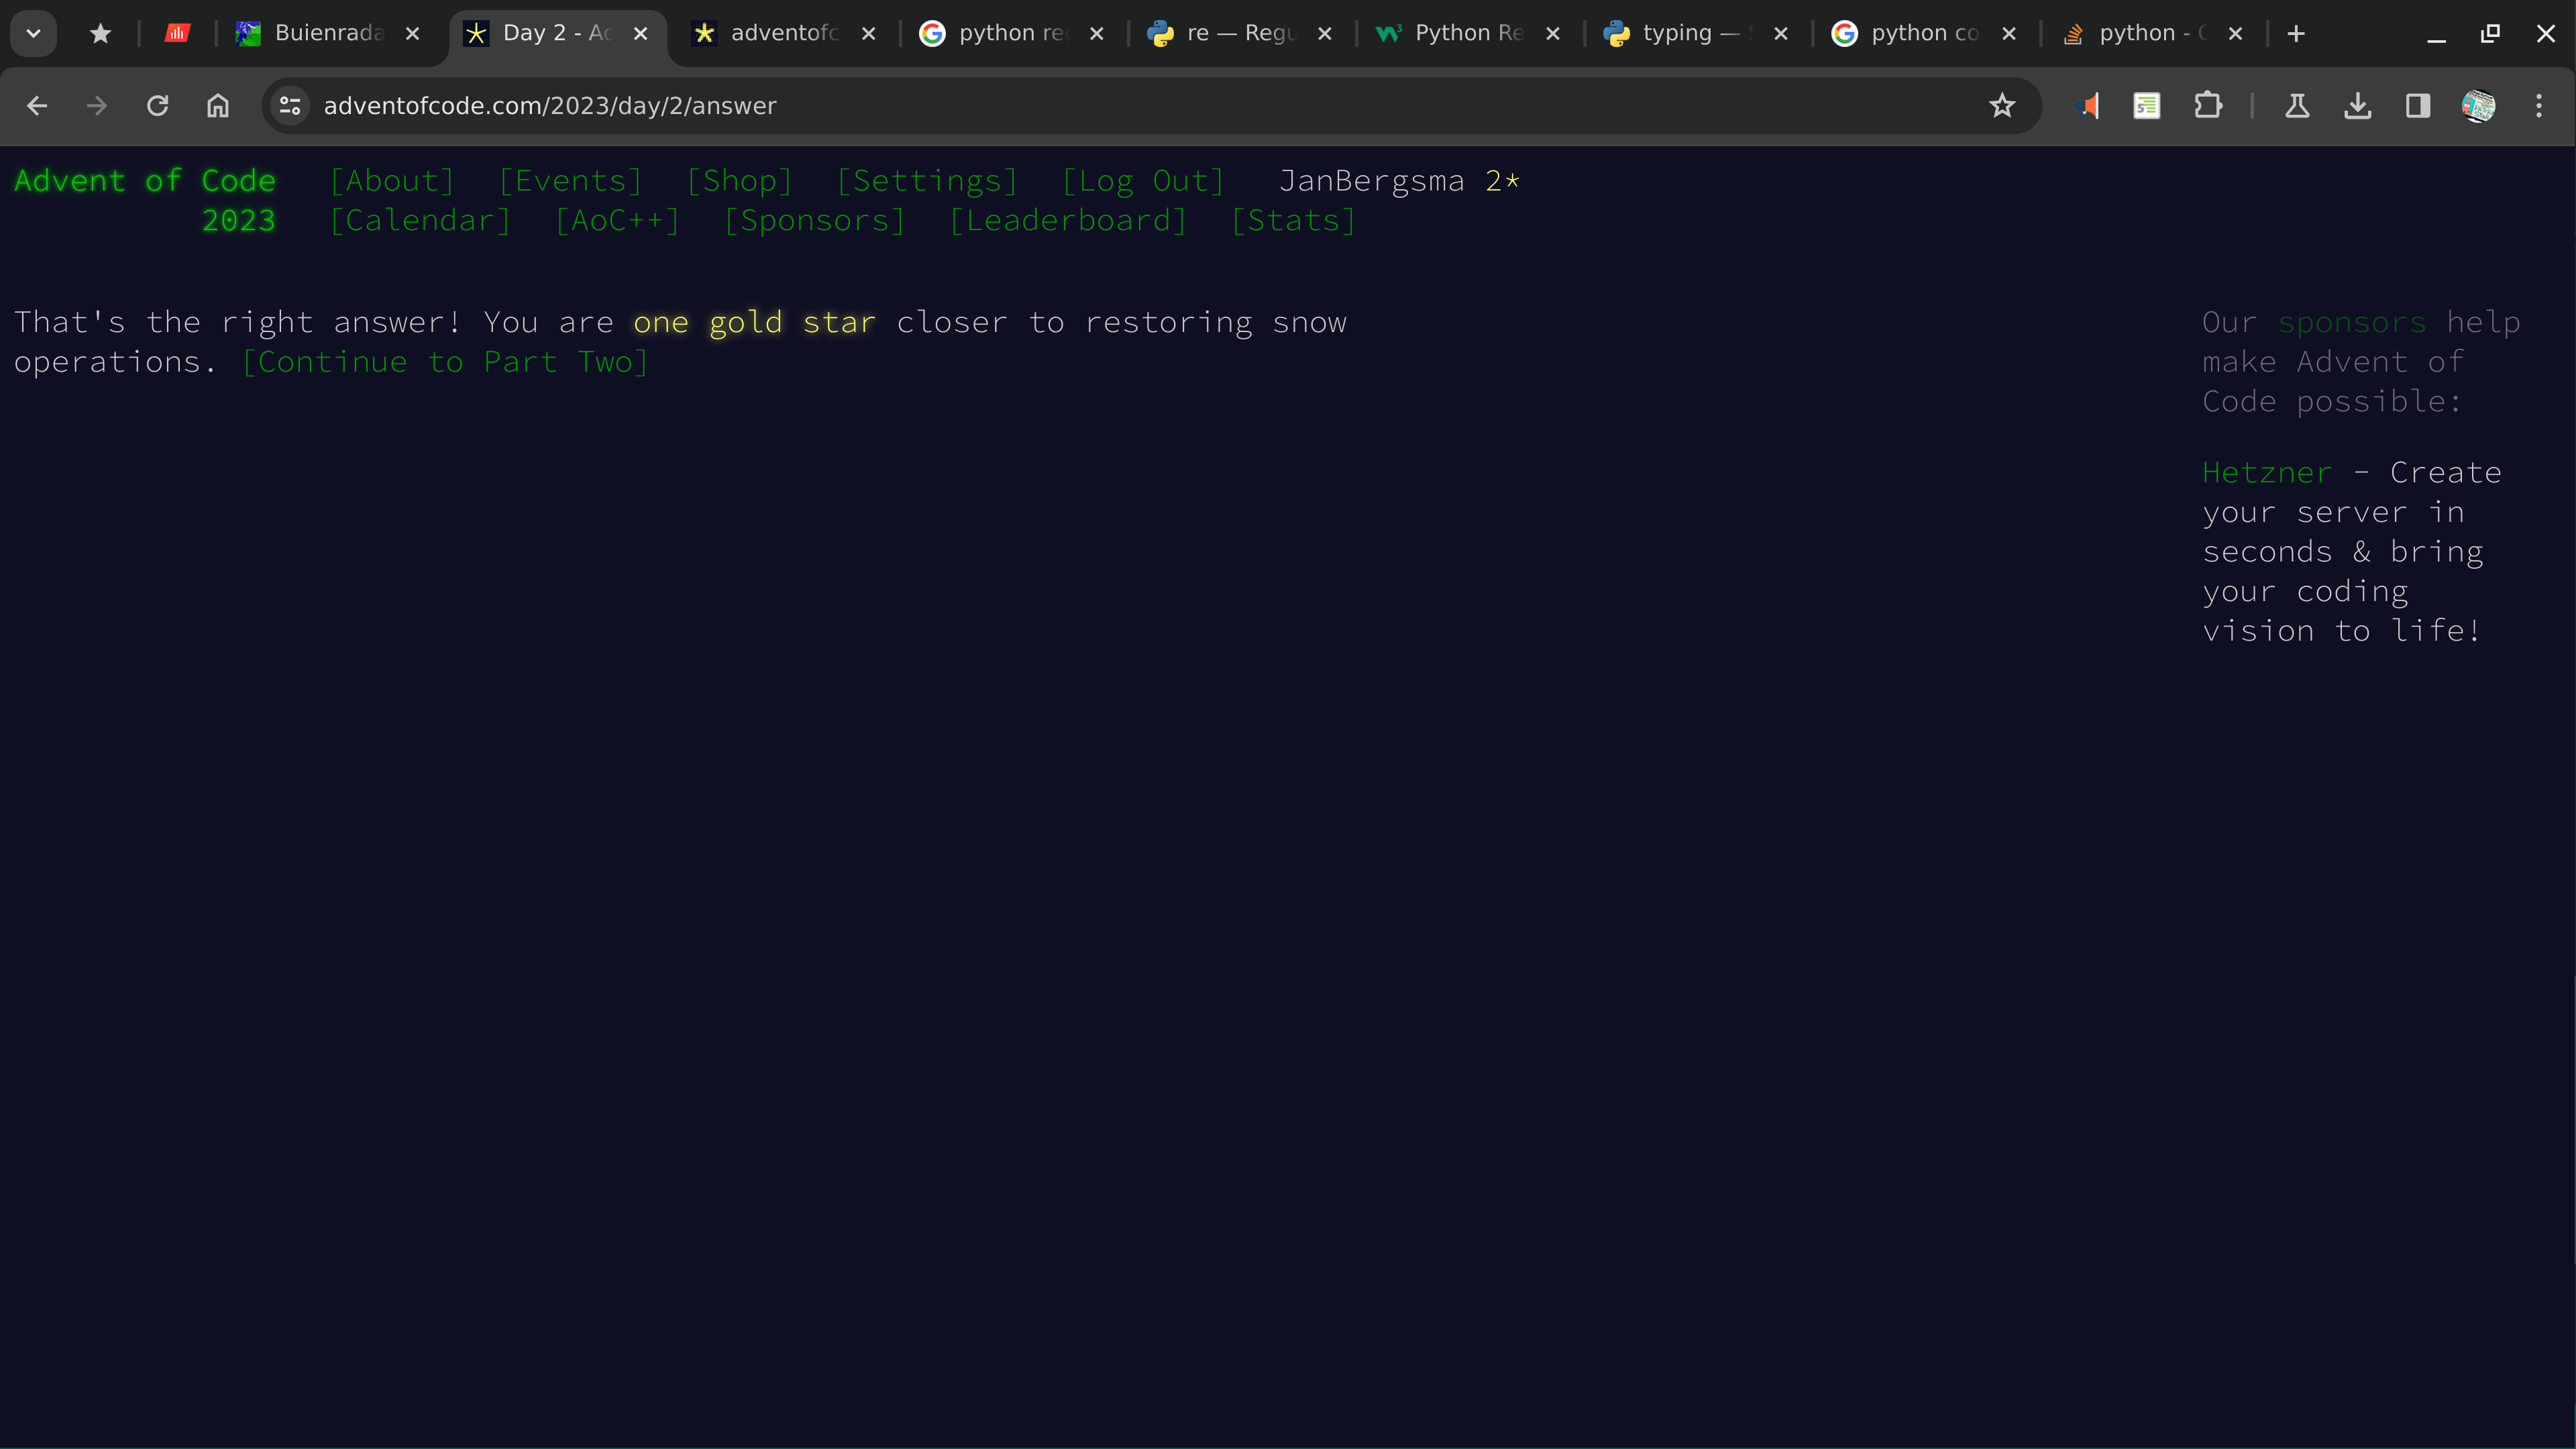
